# Without cross-validation

In [1]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Function to load and preprocess images
def load_images_and_labels(dataset_path, image_size):
    images = []
    labels = []
    class_names = sorted(os.listdir(dataset_path))  # Sorted class names
    class_to_index = {cls_name: idx for idx, cls_name in enumerate(class_names)}  # Map classes to indices
    for cls_name in class_names:
        class_path = os.path.join(dataset_path, cls_name)
        if os.path.isdir(class_path):  # Only process directories
            for file_name in os.listdir(class_path):
                if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                    img_path = os.path.join(class_path, file_name)
                    img = tf.keras.utils.load_img(img_path, color_mode="grayscale", target_size=image_size)
                    img_array = tf.keras.utils.img_to_array(img) / 255.0  # Normalize to [0, 1]
                    images.append(img_array)
                    labels.append(class_to_index[cls_name])
                else:
                    print(f"Skipped file: {file_name}")
    return np.array(images), np.array(labels), class_names

# Dataset path and image size
dataset_path = "E:\\Fall 2024\\CI\\Project\\bollywood dataset//bollywood_celeb_faces_0"
image_size = (112, 112)  # Resize images to 112x112

# Load dataset
images, labels, class_names = load_images_and_labels(dataset_path, image_size)
print(f"Loaded {images.shape[0]} images with shape {images.shape[1:]} and {len(class_names)} classes.")

Skipped file: pic3 (1)
Skipped file: pic 4 (1)
Skipped file: pic 5 (1)
Skipped file: pic 6 (1)
Skipped file: pic7 (1)
Skipped file: pic8 (1)
Skipped file: pic9 (1)
Skipped file: pic10 (1)
Skipped file: pic11 (1)
Skipped file: pic12 (1)
Skipped file: pic13 (1)
Skipped file: pic14 (1)
Skipped file: pic15 (1)
Skipped file: pic16 (1)
Skipped file: pic17 (1)
Skipped file: pic18 (1)
Skipped file: pic19 (1)
Skipped file: pic20 (1)
Skipped file: oic21 (1)
Skipped file: pic 22 (1)
Skipped file: pic23 (1)
Skipped file: pic24 (1)
Skipped file: pic25 (1)
Skipped file: pic26 (1)
Skipped file: pic27 (1)
Skipped file: pic 28 (1)
Skipped file: pic28 (1)
Skipped file: pic29 (1)
Skipped file: pic29 (1)


C:\Users\PC\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:890: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Skipped file: pic30 (1)
Skipped file: pic31 (1)
Skipped file: x1 (1)
Skipped file: x2 (1)
Skipped file: x3 (1)
Skipped file: x4 (1)
Skipped file: x5 (1)
Skipped file: x6 (1)
Skipped file: x7 (1)
Skipped file: x8 (1)
Skipped file: x9 (1)
Skipped file: x10 (1)
Skipped file: x11 (1)
Skipped file: x12 (1)
Skipped file: x13 (1)
Skipped file: x14 (1)
Skipped file: x15 (1)
Skipped file: x16 (1)
Skipped file: x17 (1)
Skipped file: x18 (1)
Skipped file: x19 (1)
Skipped file: x20 (1)
Skipped file: x21 (1)
Skipped file: x21 (1)
Skipped file: x22 (1)
Skipped file: x23 (1)
Skipped file: x24 (1)
Skipped file: x25 (1)
Skipped file: x26 (1)
Skipped file: x27 (1)
Skipped file: x28 (1)
Skipped file: x29 (1)
Skipped file: x30 (1)
Skipped file: x31 (1)
Skipped file: x32 (1)
Loaded 7790 images with shape (112, 112, 1) and 66 classes.


Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.0164 - loss: 14.5838 - val_accuracy: 0.0214 - val_loss: 4.2361
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0314 - loss: 4.1507 - val_accuracy: 0.0240 - val_loss: 4.2343
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0479 - loss: 4.0478 - val_accuracy: 0.0283 - val_loss: 4.2254
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0543 - loss: 3.9861 - val_accuracy: 0.0377 - val_loss: 4.2307
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0738 - loss: 3.8797 - val_accuracy: 0.0385 - val_loss: 4.2805
Epoch 6/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0917 - loss: 3.7947 - val_accuracy: 0.0351 - val_loss: 4.2978
Epoch 7/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1000 - loss: 3.6925 - val_accuracy: 0.0437 - val_loss: 4.3755
Epoch 8/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1202 - loss: 3.6029 - val_acc

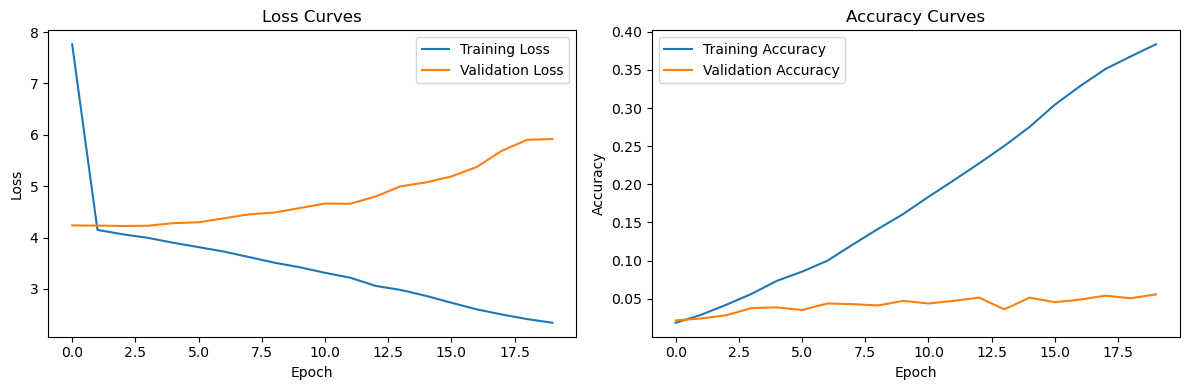

In [3]:
# Add a classifier on top of the encoder
def build_classifier(encoder):
    classifier_input = encoder.output
    x = tf.keras.layers.Dense(64, activation='relu')(classifier_input)
    x = tf.keras.layers.Dense(len(np.unique(train_labels)), activation='softmax')(x)
    return tf.keras.Model(encoder.input, x, name="Classifier")

# Build classifier model
classifier = build_classifier(encoder)

# Compile the classifier
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the classifier
classifier_history = classifier.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=20,
    batch_size=32
)

# Evaluate on test set
test_loss, test_accuracy = classifier.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# --- Plot Training and Validation Metrics ---
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(classifier_history.history['loss'], label='Training Loss')
plt.plot(classifier_history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(classifier_history.history['accuracy'], label='Training Accuracy')
plt.plot(classifier_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


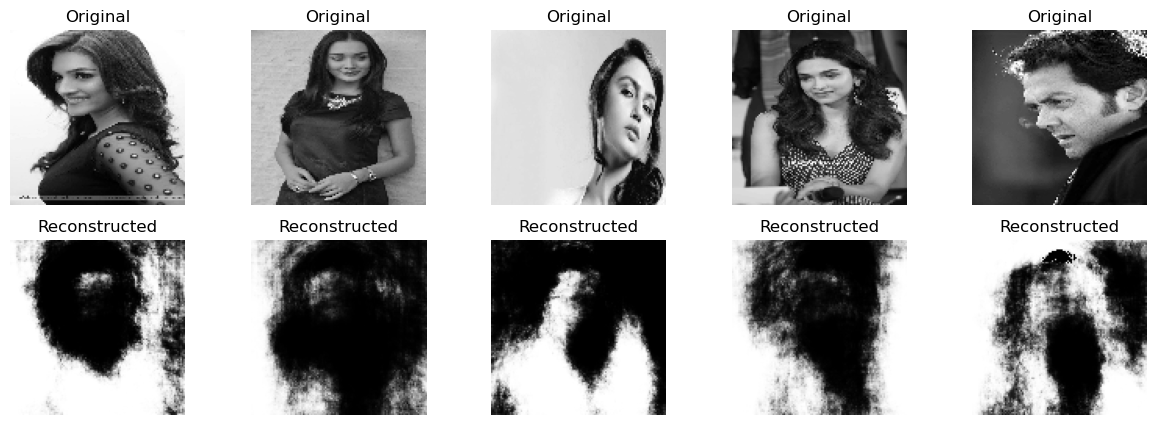

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Recognition Accuracy: 3.42%
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Recognition Accuracy: 3.42%


In [6]:
# Test Autoencoder
reconstructed_images = autoencoder.predict(test_images)

# Visualize Original vs Reconstructed
n = 5
plt.figure(figsize=(15, 5))
for i in range(n):
    # Original
    plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(112, 112), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    plt.subplot(2, n, i + n + 1)
    plt.imshow(reconstructed_images[i].reshape(112, 112), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()

# Extract Features from Encoder
encoded_features = encoder.predict(test_images)

# Recognition Accuracy using Euclidean Distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

predicted_labels = []

for i, feature in enumerate(encoded_features):
    # Compute distances to all other features except the current one
    distances = [euclidean_distance(feature, f) if i != j else np.inf for j, f in enumerate(encoded_features)]
    closest_index = np.argmin(distances)  # Find the index of the closest match
    predicted_labels.append(test_labels[closest_index])  # Use the closest match's label

accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Recognition Accuracy: {accuracy * 100:.2f}%")

# Extract Features from Encoder
encoded_features = encoder.predict(test_images)

# Recognition Accuracy using Euclidean Distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

predicted_labels = []

for i, feature in enumerate(encoded_features):
    # Compute distances to all other features except the current one
    distances = [euclidean_distance(feature, f) if i != j else np.inf for j, f in enumerate(encoded_features)]
    closest_index = np.argmin(distances)  # Find the index of the closest match
    predicted_labels.append(test_labels[closest_index])  # Use the closest match's label

accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Recognition Accuracy: {accuracy * 100:.2f}%")

# #######################################################

# With Cross-validation

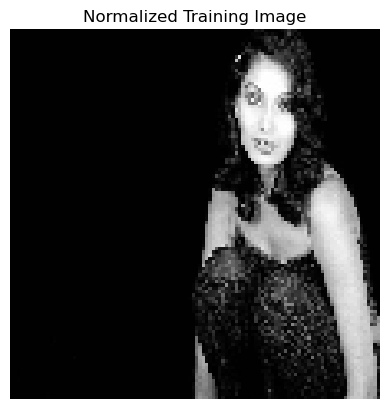

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 112, 112, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 56, 56, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     6,422,656 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,441,472 (24.57 MB)

 Trainable params: 6,441,472 (24.57 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 50176)          │     6,472,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 56, 56, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 112, 112, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 112, 112, 1)    │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,528,385 (24.90 MB)

 Trainable params: 6,528,385 (24.90 MB)

 Non-trainable params: 0 (0.00 B)

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 112, 112, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 128)            │     6,441,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 112, 112, 1)    │     6,528,385 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,969,857 (49.48 MB)

 Trainable params: 12,969,857 (49.48 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 46s 258ms/step - loss: 0.9550 - val_loss: 0.7437
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 43s 252ms/step - loss: 0.7105 - val_loss: 0.6799
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 43s 254ms/step - loss: 0.6710 - val_loss: 0.6641
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 43s 254ms/step - loss: 0.6598 - val_loss: 0.6561
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 43s 251ms/step - loss: 0.6415 - val_loss: 0.6528
Epoch 6/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 43s 251ms/step - loss: 0.6424 - val_loss: 0.6484
Epoch 7/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 43s 250ms/step - loss: 0.6394 - val_loss: 0.6466
Epoch 8/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 42s 248ms/step - loss: 0.6338 - val_loss: 0.6449
Epoch 9/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 42s 246ms/step - loss: 0.6343 - val_loss: 0.6424
Epoch 10/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 43s 252ms/step - loss: 0.6298 - val_loss: 0.6419
Epoch 11/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 43s 249ms/step - loss: 0.6224 - val_loss: 0.6410
Epoch 12/20
171/171

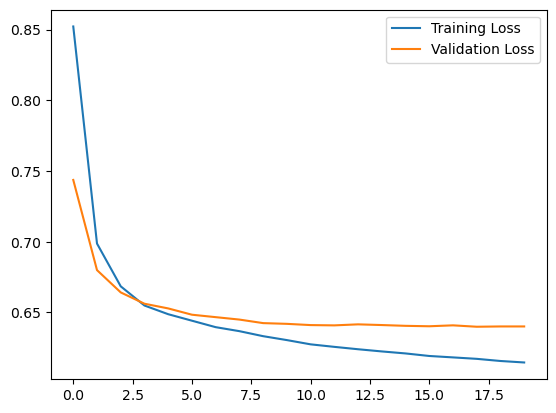

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Recognition Accuracy: 12.07%
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step


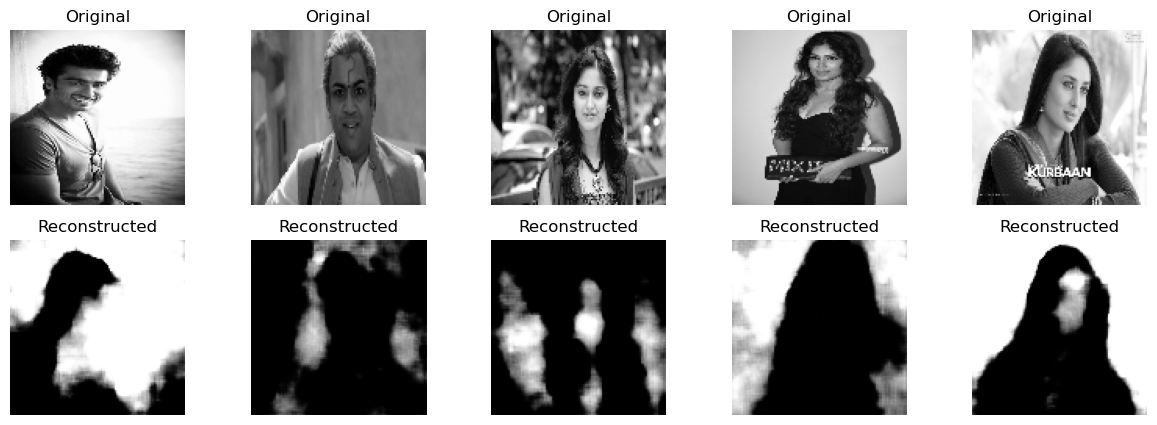

In [9]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Function to load images and their labels
def load_images_and_labels(dataset_path, image_size):
    images, labels = [], []
    label_map = {}
    current_label = 0

    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)
        if os.path.isdir(folder_path):
            label_map[current_label] = folder_name
            for file_name in os.listdir(folder_path):
                if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                    img_path = os.path.join(folder_path, file_name)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img is not None:
                        img_resized = cv2.resize(img, image_size)
                        images.append(img_resized)
                        labels.append(current_label)
            current_label += 1

    images = np.array(images, dtype=np.float32) / 255.0  # Normalize to [0, 1]
    images = np.expand_dims(images, axis=-1)
    labels = np.array(labels)
    return images, labels, label_map

# Dataset path and image size
dataset_path = "E:\\Fall 2024\\CI\\Project\\bollywood dataset\\bollywood_celeb_faces_0"
image_size = (112, 112)

# Load images and labels
images, labels, label_map = load_images_and_labels(dataset_path, image_size)

# Split the dataset into 70% training, 15% validation, and 15% testing
train_images, temp_images, train_labels, temp_labels = train_test_split(images, labels, test_size=0.3, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.5, random_state=42)

# Normalize the data
def normalize_data(images):
    mean = np.mean(images, axis=(0, 1, 2), keepdims=True)
    std = np.std(images, axis=(0, 1, 2), keepdims=True)
    normalized_images = (images - mean) / std
    return normalized_images, mean, std

train_images, train_mean, train_std = normalize_data(train_images)
val_images = (val_images - train_mean) / train_std
test_images = (test_images - train_mean) / train_std

# Visualize normalized data
plt.imshow(train_images[0].squeeze(), cmap='gray')
plt.title("Normalized Training Image")
plt.axis('off')
plt.show()

# Autoencoder Architecture
# Encoder
input_shape = image_size + (1,)
encoder_input = Input(shape=input_shape, name='encoder_input')
x = Conv2D(32, (3, 3), activation='relu', strides=2, padding='same')(encoder_input)
x = Conv2D(64, (3, 3), activation='relu', strides=2, padding='same')(x)
x = Flatten()(x)
encoded = Dense(128, activation='relu')(x)

encoder = Model(encoder_input, encoded, name='encoder')
encoder.summary()

# Decoder
decoder_input = Input(shape=(128,), name='decoder_input')
x = Dense(28 * 28 * 64, activation='relu')(decoder_input)
x = Reshape((28, 28, 64))(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', strides=2, padding='same')(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', strides=2, padding='same')(x)
decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

decoder = Model(decoder_input, decoded, name='decoder')
decoder.summary()

# Autoencoder Model
autoencoder_input = encoder_input
encoded_features = encoder(autoencoder_input)
autoencoder_output = decoder(encoded_features)

autoencoder = Model(autoencoder_input, autoencoder_output, name='autoencoder')
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

# Train Autoencoder
history = autoencoder.fit(
    train_images, train_images,
    validation_data=(val_images, val_images),
    epochs=20,
    batch_size=32
)

# Visualize Training Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Feature Extraction
train_features = encoder.predict(train_images)
test_features = encoder.predict(test_images)

# Minimum Euclidean Distance Classifier
predicted_labels = []
for test_feature in test_features:
    distances = cdist([test_feature], train_features, metric='euclidean')
    nearest_index = np.argmin(distances)
    predicted_labels.append(train_labels[nearest_index])

predicted_labels = np.array(predicted_labels)

# Compute Recognition Accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Recognition Accuracy: {accuracy * 100:.2f}%")

# Test Autoencoder
reconstructed_images = autoencoder.predict(test_images)

# Visualize Original vs Reconstructed
n = 5
plt.figure(figsize=(15, 5))
for i in range(n):
    # Original
    plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(112, 112), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    plt.subplot(2, n, i + n + 1)
    plt.imshow(reconstructed_images[i].reshape(112, 112), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()


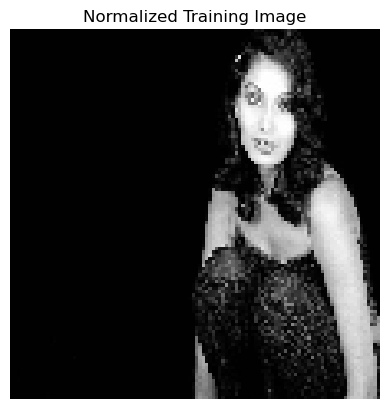

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 112, 112, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoded_features (Dense)        │ (None, 128)            │     6,422,656 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,441,472 (24.57 MB)

 Trainable params: 6,441,472 (24.57 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50176)          │     6,472,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_9              │ (None, 56, 56, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_10             │ (None, 112, 112, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_11             │ (None, 112, 112, 1)    │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,528,385 (24.90 MB)

 Trainable params: 6,528,385 (24.90 MB)

 Non-trainable params: 0 (0.00 B)

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 112, 112, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 128)            │     6,441,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 112, 112, 1)    │     6,528,385 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,969,857 (49.48 MB)

 Trainable params: 12,969,857 (49.48 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 52s 282ms/step - loss: 0.9944 - val_loss: 0.8069
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 46s 268ms/step - loss: 0.7815 - val_loss: 0.6857
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 46s 268ms/step - loss: 0.6698 - val_loss: 0.6551
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 45s 265ms/step - loss: 0.6455 - val_loss: 0.6419
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 45s 266ms/step - loss: 0.6358 - val_loss: 0.6382
Epoch 6/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 42s 247ms/step - loss: 0.6346 - val_loss: 0.6343
Epoch 7/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 43s 249ms/step - loss: 0.6284 - val_loss: 0.6330
Epoch 8/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 45s 261ms/step - loss: 0.6217 - val_loss: 0.6299
Epoch 9/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 42s 247ms/step - loss: 0.6226 - val_loss: 0.6291
Epoch 10/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 43s 249ms/step - loss: 0.6102 - val_loss: 0.6298
Epoch 11/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 45s 265ms/step - loss: 0.6148 - val_loss: 0.6285
Epoch 12/20
171/171

Model: "classification_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 112, 112, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoded_features (Dense)        │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 66)             │         8,514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,449,986 (24.60 MB)

 Trainable params: 6,449,986 (24.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - accuracy: 0.0197 - loss: 7.0636 - val_accuracy: 0.0325 - val_loss: 4.1666
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.1852 - loss: 3.6532 - val_accuracy: 0.0822 - val_loss: 4.1270
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - accuracy: 0.8649 - loss: 0.7912 - val_accuracy: 0.0882 - val_loss: 5.0625
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - accuracy: 0.9974 - loss: 0.0269 - val_accuracy: 0.0822 - val_loss: 5.9114
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 13s 76ms/step - accuracy: 0.9990 - loss: 0.0147 - val_accuracy: 0.0839 - val_loss: 5.7581
Epoch 6/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - accuracy: 0.9992 - loss: 0.0094 - val_accuracy: 0.0882 - val_loss: 5.9015
Epoch 7/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.9983 - loss: 0.0177 - val_accuracy: 0.0865 - val_loss: 5.8106
Epoch 8/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - accuracy: 0.9996 - loss: 0.0053 - 

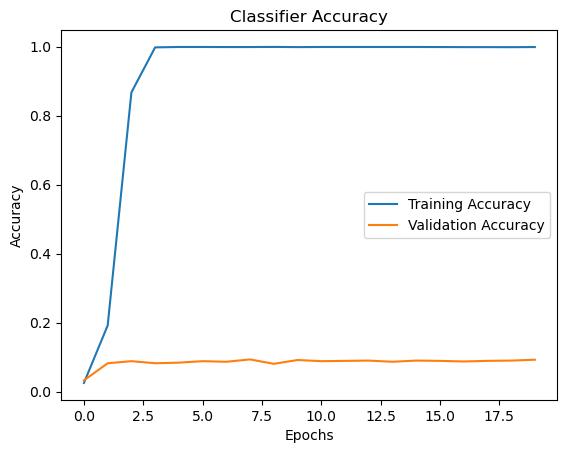

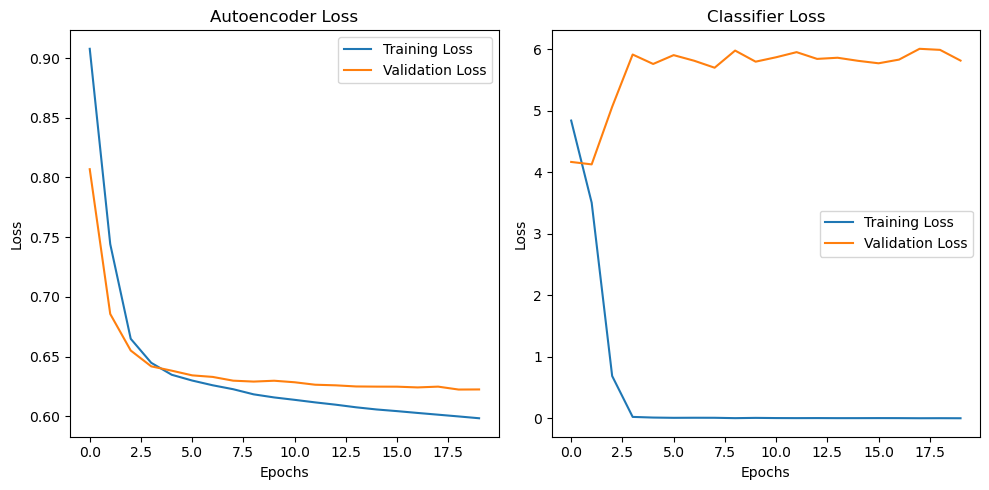

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0951 - loss: 5.8635
Test Accuracy: 8.99%
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0951 - loss: 5.8635
Test Accuracy: 8.99%


In [14]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Function to load images and their labels
def load_images_and_labels(dataset_path, image_size):
    images, labels = [], []
    label_map = {}
    current_label = 0

    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)
        if os.path.isdir(folder_path):
            label_map[current_label] = folder_name
            for file_name in os.listdir(folder_path):
                if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):  # Check image file extensions
                    img_path = os.path.join(folder_path, file_name)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img is not None:
                        img_resized = cv2.resize(img, image_size)
                        images.append(img_resized)
                        labels.append(current_label)
            current_label += 1

    images = np.array(images, dtype=np.float32) / 255.0  # Normalize to [0, 1]
    images = np.expand_dims(images, axis=-1)
    labels = np.array(labels)
    return images, labels, label_map

# Dataset path and image size
dataset_path = "E:\\Fall 2024\\CI\\Project\\bollywood dataset\\bollywood_celeb_faces_0"
image_size = (112, 112)

# Load images and labels
images, labels, label_map = load_images_and_labels(dataset_path, image_size)

# Split the dataset into 70% training, 15% validation, and 15% testing
train_images, temp_images, train_labels, temp_labels = train_test_split(images, labels, test_size=0.3, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.5, random_state=42)

# Normalize the data
def normalize_data(images):
    mean = np.mean(images, axis=(0, 1, 2), keepdims=True)
    std = np.std(images, axis=(0, 1, 2), keepdims=True)
    normalized_images = (images - mean) / std
    return normalized_images, mean, std

train_images, train_mean, train_std = normalize_data(train_images)
val_images = (val_images - train_mean) / train_std
test_images = (test_images - train_mean) / train_std

# Visualize normalized data
plt.imshow(train_images[0].squeeze(), cmap='gray')
plt.title("Normalized Training Image")
plt.axis('off')
plt.show()

# Autoencoder Architecture
# Encoder
input_shape = image_size + (1,)
encoder_input = Input(shape=input_shape, name='encoder_input')
x = Conv2D(32, (3, 3), activation='relu', strides=2, padding='same')(encoder_input)
x = Conv2D(64, (3, 3), activation='relu', strides=2, padding='same')(x)
x = Flatten()(x)
encoded = Dense(128, activation='relu', name='encoded_features')(x)

encoder = Model(encoder_input, encoded, name='encoder')
encoder.summary()

# Decoder
decoder_input = Input(shape=(128,), name='decoder_input')
x = Dense(28 * 28 * 64, activation='relu')(decoder_input)
x = Reshape((28, 28, 64))(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', strides=2, padding='same')(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', strides=2, padding='same')(x)
decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

decoder = Model(decoder_input, decoded, name='decoder')
decoder.summary()

# Autoencoder Model
autoencoder_input = encoder_input
encoded_features = encoder(autoencoder_input)
autoencoder_output = decoder(encoded_features)

autoencoder = Model(autoencoder_input, autoencoder_output, name='autoencoder')
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

# Train Autoencoder
history = autoencoder.fit(
    train_images, train_images,
    validation_data=(val_images, val_images),
    epochs=20,
    batch_size=32
)

# Classification Model
classification_head = Dense(len(np.unique(labels)), activation='softmax', name='classifier')(encoded)
classification_model = Model(encoder_input, classification_head, name='classification_model')
classification_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classification_model.summary()

# Train Classifier
history_classifier = classification_model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=20,
    batch_size=32
)

# Visualize Training and Validation Accuracy
plt.plot(history_classifier.history['accuracy'], label='Training Accuracy')
plt.plot(history_classifier.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Classifier Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

# Plot Training and Validation Loss for Autoencoder and Classifier
plt.figure(figsize=(10, 5))

# Autoencoder Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Autoencoder Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Classifier Loss
plt.subplot(1, 2, 2)
plt.plot(history_classifier.history['loss'], label='Training Loss')
plt.plot(history_classifier.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Classifier Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Show the plot
plt.tight_layout()
plt.show()

# Evaluate on Test Data
test_loss, test_accuracy = classification_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
s, test_accuracy = classification_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
